# MatTranspose

## Notes
- The pictures do not show the standard deviation as the number is too
  little to be pictured, being usually one or two orderd of magnitude smaller

In [3]:
# libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator
import re
from unum import Unum
# data
from data.data import *
from data.cluster_data import *

# setup
sns.set_theme(style="whitegrid", palette="Set2", font_scale=0.85, rc={
    'xtick.bottom': True,
    'ytick.left': True,
})
# sns.set_theme(style="ticks", palette="Set2")
# Read the data
raw_data_o0: pd.DataFrame = data.parse_data('../reports/base.txt')
raw_data_o1: pd.DataFrame = data.parse_data('../reports/opt_o1.txt')
raw_data_o2: pd.DataFrame = data.parse_data('../reports/opt_o2.txt')
raw_data_o3: pd.DataFrame = data.parse_data('../reports/opt_o3.txt')
checkSymm = raw_data_o0.loc[raw_data_o0.name.isin(['matTranspose base'])].copy()
checkSymm.name = 'matTranspose base o0'

# Base

In [4]:
checkSymm_implicit_o0 = raw_data_o0.loc[raw_data_o0.name.isin(['matTranspose vectorization', 'matTranspose unrolling outer',  \
                                                      'matTranspose unrolling inner', 'matTranspose cyclic unrolled'])].copy()
checkSymm_implicit_o1 = raw_data_o1.loc[raw_data_o1.name.isin(['matTranspose vectorization', 'matTranspose unrolling outer',  \
                                                      'matTranspose unrolling inner', 'matTranspose cyclic unrolled'])].copy()
checkSymm_implicit_o2 = raw_data_o2.loc[raw_data_o2.name.isin(['matTranspose vectorization', 'matTranspose unrolling outer',  \
                                                      'matTranspose unrolling inner', 'matTranspose cyclic unrolled'])].copy()
checkSymm_implicit_o3 = raw_data_o3.loc[raw_data_o3.name.isin(['matTranspose vectorization', 'matTranspose unrolling outer',  \
                                                      'matTranspose unrolling inner', 'matTranspose cyclic unrolled'])].copy()

In [5]:
checkSymm_base_o0 = raw_data_o0.loc[raw_data_o0.name.isin(['matTranspose base', 'matTranspose columns', 'matTranspose half', 'matTranspose intrinsic', 'matTranspose cyclic', 'matTranspose intrinsic cyclic'])].copy()
checkSymm_base_o1 = raw_data_o1.loc[raw_data_o1.name.isin(['matTranspose base', 'matTranspose columns', 'matTranspose half', 'matTranspose intrinsic', 'matTranspose cyclic', 'matTranspose intrinsic cyclic'])].copy()
checkSymm_base_o2 = raw_data_o2.loc[raw_data_o2.name.isin(['matTranspose base', 'matTranspose columns', 'matTranspose half', 'matTranspose intrinsic', 'matTranspose cyclic', 'matTranspose intrinsic cyclic'])].copy()
checkSymm_base_o3 = raw_data_o3.loc[raw_data_o3.name.isin(['matTranspose base', 'matTranspose columns', 'matTranspose half', 'matTranspose intrinsic', 'matTranspose cyclic', 'matTranspose intrinsic cyclic'])].copy()

In [6]:
checkSymm_omp_o0 = raw_data_o0.loc[raw_data_o0.name.isin(['matTranspose omp 2','matTranspose omp 4','matTranspose omp 8', \
                                                         'matTranspose omp 16','matTranspose omp 32','matTranspose omp 64'])].copy()
checkSymm_omp_o1 = raw_data_o1.loc[raw_data_o1.name.isin(['matTranspose omp 2','matTranspose omp 4','matTranspose omp 8', \
                                                         'matTranspose omp 16','matTranspose omp 32','matTranspose omp 64'])].copy()
checkSymm_omp_o2 = raw_data_o2.loc[raw_data_o2.name.isin(['matTranspose omp 2','matTranspose omp 4','matTranspose omp 8', \
                                                         'matTranspose omp 16','matTranspose omp 32','matTranspose omp 64'])].copy()
checkSymm_omp_o3 = raw_data_o3.loc[raw_data_o3.name.isin(['matTranspose omp 2','matTranspose omp 4','matTranspose omp 8', \
                                                         'matTranspose omp 16','matTranspose omp 32','matTranspose omp 64'])].copy()

In [7]:
checkSymm_omp_sched_o0 = raw_data_o0.loc[raw_data_o0.name.isin(['matTranspose omp 16 sched static','matTranspose omp 16 sched dynamic', \
                                                               'matTranspose omp 16 sched guided'])].copy()
checkSymm_omp_sched_o1 = raw_data_o1.loc[raw_data_o1.name.isin(['matTranspose omp 16 sched static','matTranspose omp 16 sched dynamic', \
                                                               'matTranspose omp 16 sched guided'])].copy()
checkSymm_omp_sched_o2 = raw_data_o2.loc[raw_data_o2.name.isin(['matTranspose omp 16 sched static','matTranspose omp 16 sched dynamic', \
                                                               'matTranspose omp 16 sched guided'])].copy()
checkSymm_omp_sched_o3 = raw_data_o3.loc[raw_data_o3.name.isin(['matTranspose omp 16 sched static','matTranspose omp 16 sched dynamic', \
                                                               'matTranspose omp 16 sched guided'])].copy()

# Amalgamated

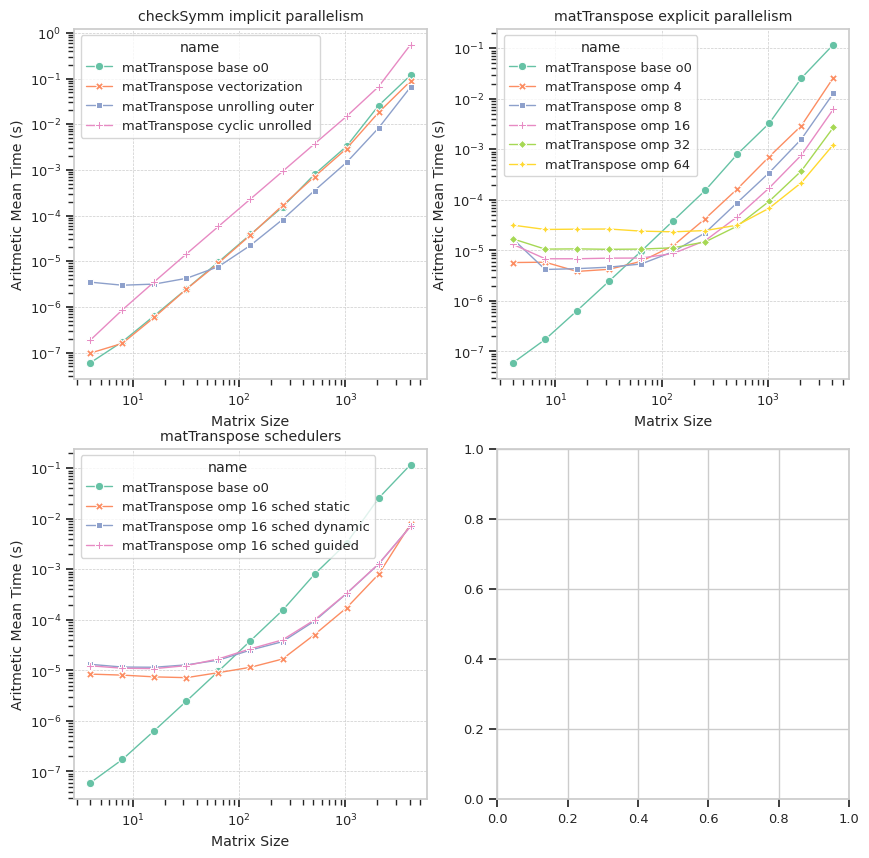

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

lp1 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_implicit_o0]),
    x="space", y="mean", hue="name", style="name",
    markers=True, dashes=False, ax=axes[0][0],
    linewidth = 1
)

axes[0][0].set_yscale('log')
axes[0][0].set_xscale('log')
axes[0][0].set_title('checkSymm implicit parallelism')
axes[0][0].set_xlabel('Matrix Size')
axes[0][0].set_ylabel('Aritmetic Mean Time (s)')
axes[0,0].grid(True, which='major', linestyle='--', linewidth=0.5)

lp1 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_omp_o0]),
    x="space", y="mean", hue="name", style="name",
    markers=True, dashes=False, ax=axes[0][1],
    linewidth = 1
)

axes[0][1].set_yscale('log')
axes[0][1].set_xscale('log')
axes[0][1].set_title('matTranspose explicit parallelism')
axes[0][1].set_xlabel('Matrix Size')
axes[0][1].set_ylabel('Aritmetic Mean Time (s)')
axes[0,1].grid(True, which='major', linestyle='--', linewidth=0.5)

lp1 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_omp_sched_o0]),
    x="space", y="mean", hue="name", style="name",
    markers=True, dashes=False, ax=axes[1][0],
    linewidth = 1
)

axes[1][0].set_yscale('log')
axes[1][0].set_xscale('log')
axes[1][0].set_title('matTranspose schedulers')
axes[1][0].set_xlabel('Matrix Size')
axes[1][0].set_ylabel('Aritmetic Mean Time (s)')
axes[1,0].grid(True, which='major', linestyle='--', linewidth=0.5)

## Roofline

# Implicit Parallelism

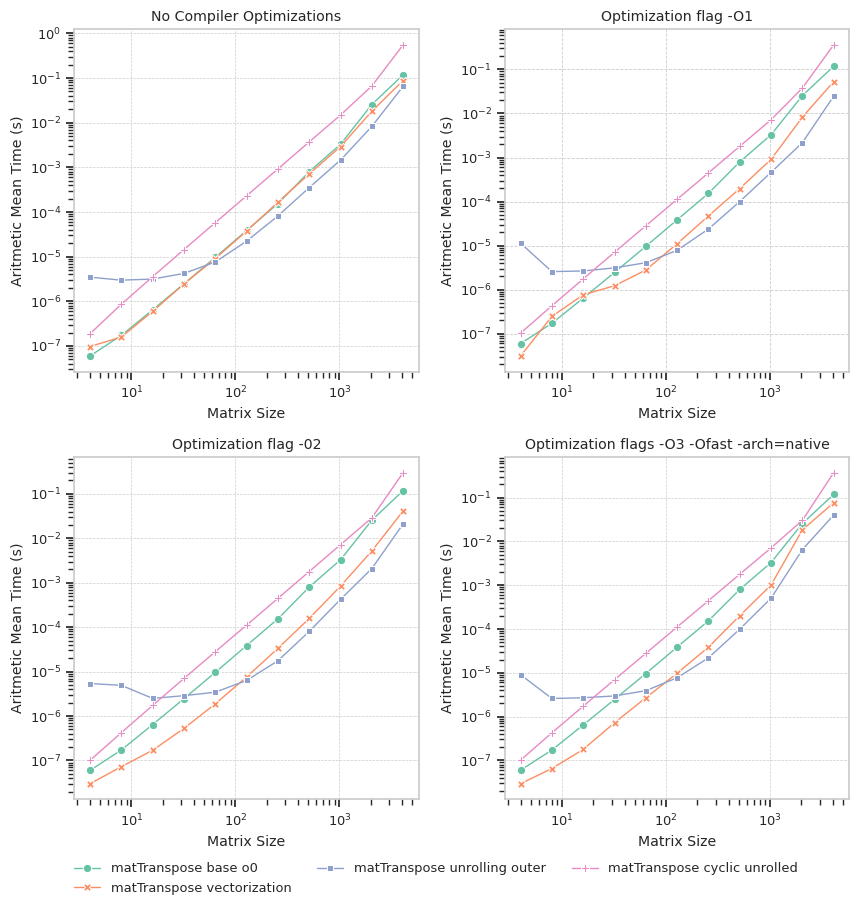

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

lp1 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_implicit_o0]),
    x="space", y="mean", hue="name", style="name",
    markers=True, dashes=False, ax=axes[0][0],
    linewidth = 1
)

axes[0][0].set_yscale('log')
axes[0][0].set_xscale('log')
axes[0][0].set_title('No Compiler Optimizations')
axes[0][0].set_xlabel('Matrix Size')
axes[0][0].set_ylabel('Aritmetic Mean Time (s)')
axes[0,0].grid(True, which='major', linestyle='--', linewidth=0.5)


# TODO
lp2 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_implicit_o1]),
    x="space", y="mean", hue="name", style="name",
    markers=True, dashes=False, ax=axes[0][1], legend=False,
    linewidth = 1
)
axes[0][1].set_yscale('log')
axes[0][1].set_xscale('log')
axes[0][1].set_title('Optimization flag -O1')
axes[0][1].set_xlabel('Matrix Size')
axes[0][1].set_ylabel('Aritmetic Mean Time (s)')
axes[0,1].grid(which='major', linestyle='--', linewidth=0.6)

lp3 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_implicit_o2]),
    x="space", y="mean", hue="name", style="name",
    markers=True, dashes=False, ax=axes[1][0], legend=False,
    linewidth = 1
)
axes[1][0].set_yscale('log')
axes[1][0].set_xscale('log')
axes[1][0].set_title('Optimization flag -02')
axes[1][0].set_xlabel('Matrix Size')
axes[1][0].set_ylabel('Aritmetic Mean Time (s)')
axes[1,0].grid(which='major', linestyle='--', linewidth=0.5)

lp3 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_implicit_o3]),
    x="space", y="mean", hue="name", style="name",
    markers=True, dashes=False, ax=axes[1][1], legend=False,
    linewidth = 1
)
axes[1][1].set_yscale('log')
axes[1][1].set_xscale('log')
axes[1][1].set_title('Optimization flags -O3 -Ofast -arch=native')
axes[1][1].set_xlabel('Matrix Size')
axes[1][1].set_ylabel('Aritmetic Mean Time (s)')
axes[1,1].grid(which='major', linestyle='--', linewidth=0.5)

sns.move_legend(
    lp1, "upper center",
    bbox_to_anchor=(1.05, -1.4), ncol=3, title="", frameon=False,
)
fig.subplots_adjust(hspace=0.25, wspace=0.25)
plt.show()
fig.savefig("../images/transpose_implicit.svg", format='svg') 

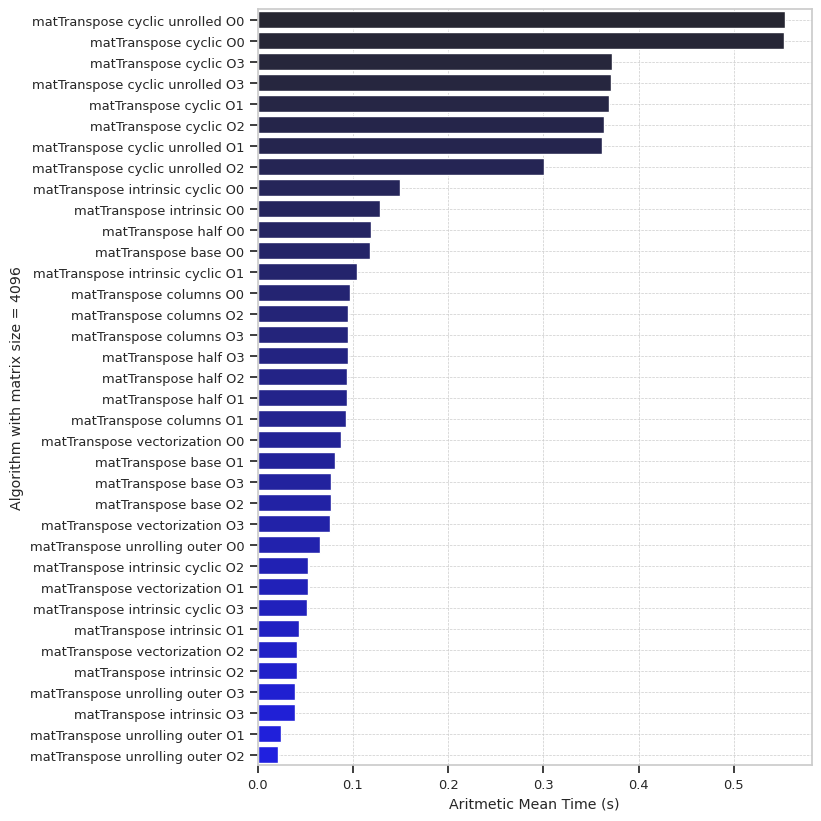

In [8]:
sns.set_theme(style="whitegrid", palette="Set2", font_scale=0.85, rc={
    'xtick.bottom': True,
    'ytick.left': True,
    'figure.figsize':(8.27,8.27)
})
cs_base_o0 = checkSymm_base_o0.copy()
cs_base_o0['name'] = cs_base_o0.apply(lambda row: row['name'] + ' O0', axis=1)
cs_base_o1 = checkSymm_base_o1.copy()
cs_base_o1['name'] = cs_base_o1.apply(lambda row: row['name'] + ' O1', axis=1)
cs_base_o2 = checkSymm_base_o2.copy()
cs_base_o2['name'] = cs_base_o2.apply(lambda row: row['name'] + ' O2', axis=1)
cs_base_o3 = checkSymm_base_o3.copy()
cs_base_o3['name'] = cs_base_o3.apply(lambda row: row['name'] + ' O3', axis=1)

cs_imp_o0 = checkSymm_implicit_o0.copy()
cs_imp_o0['name'] = cs_imp_o0.apply(lambda row: row['name'] + ' O0', axis=1)
cs_imp_o1 = checkSymm_implicit_o1.copy()
cs_imp_o1['name'] = cs_imp_o1.apply(lambda row: row['name'] + ' O1', axis=1)
cs_imp_o2 = checkSymm_implicit_o2.copy()
cs_imp_o2['name'] = cs_imp_o2.apply(lambda row: row['name'] + ' O2', axis=1)
cs_imp_o3 = checkSymm_implicit_o3.copy()
cs_imp_o3['name'] = cs_imp_o3.apply(lambda row: row['name'] + ' O3', axis=1)

cs_all = pd.concat([cs_base_o0, cs_base_o1, cs_base_o2, cs_base_o3,
                                    cs_imp_o0, cs_imp_o1, cs_imp_o2, cs_imp_o3])
cs_cut = cs_all.loc[cs_all.space == 4096]
cs_cut = cs_cut.sort_values(by=['mean'], ascending=False)

sns.barplot(x="mean", y="name", data=cs_cut, errorbar=None,
            hue='name', orient='h', palette='dark:b')
sns.set(font_scale=0.7)
plt.ylabel('Algorithm with matrix size = 4096')
plt.xlabel('Aritmetic Mean Time (s)')
plt.grid(which='major', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.savefig("../images/transpose_implicit_bars.svg", format='svg') 

# Explicit Parallelism

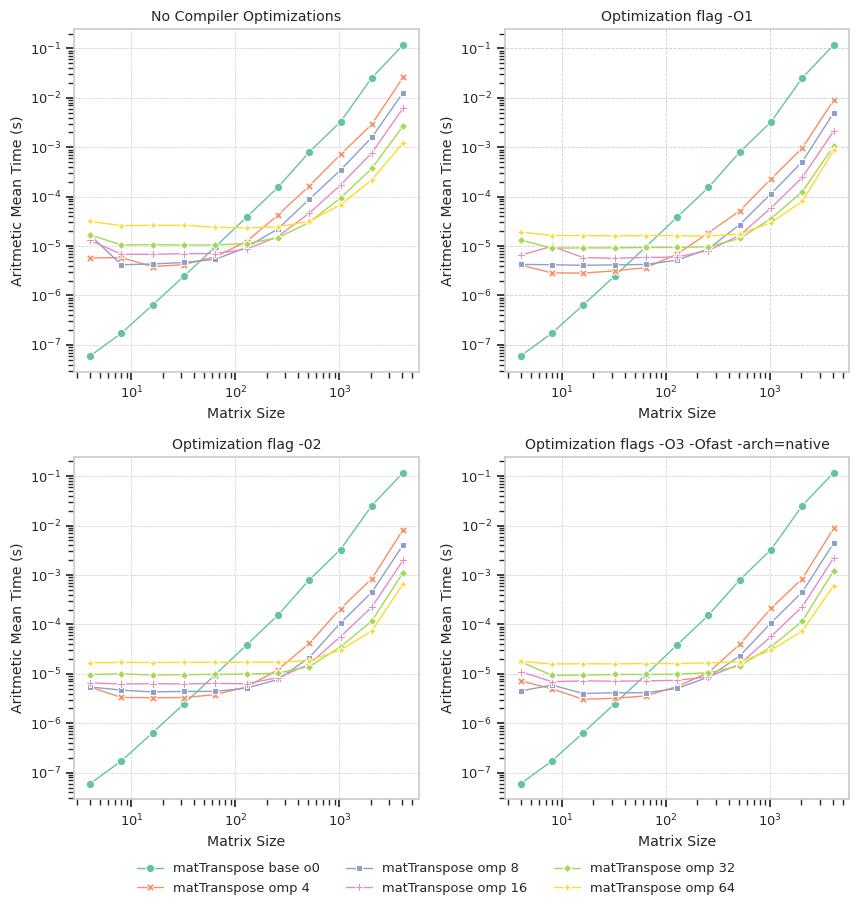

In [10]:
sns.set_theme(style="whitegrid", palette="Set2", font_scale=0.85, rc={
    'xtick.bottom': True,
    'ytick.left': True,
})

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

lp1 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_omp_o0]),
    x="space", y="mean", hue="name", style="name",
    markers=True, dashes=False, ax=axes[0][0],
    linewidth = 1
)

axes[0][0].set_yscale('log')
axes[0][0].set_xscale('log')
axes[0][0].set_title('No Compiler Optimizations')
axes[0][0].set_xlabel('Matrix Size')
axes[0][0].set_ylabel('Aritmetic Mean Time (s)')
axes[0,0].grid(True, which='major', linestyle='--', linewidth=0.5)

lp2 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_omp_o1]),
    x="space", y="mean", hue="name", style="name",
    markers=True, dashes=False, ax=axes[0][1], legend=False,
    linewidth = 1
)
axes[0][1].set_yscale('log')
axes[0][1].set_xscale('log')
axes[0][1].set_title('Optimization flag -O1')
axes[0][1].set_xlabel('Matrix Size')
axes[0][1].set_ylabel('Aritmetic Mean Time (s)')
axes[0,1].grid(which='major', linestyle='--', linewidth=0.6)

lp3 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_omp_o2]),
    x="space", y="mean", hue="name", style="name",
    markers=True, dashes=False, ax=axes[1][0], legend=False,
    linewidth = 1
)
axes[1][0].set_yscale('log')
axes[1][0].set_xscale('log')
axes[1][0].set_title('Optimization flag -02')
axes[1][0].set_xlabel('Matrix Size')
axes[1][0].set_ylabel('Aritmetic Mean Time (s)')
axes[1,0].grid(which='major', linestyle='--', linewidth=0.5)

lp3 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_omp_o3]),
    x="space", y="mean", hue="name", style="name",
    markers=True, dashes=False, ax=axes[1][1], legend=False,
    linewidth = 1
)
axes[1][1].set_yscale('log')
axes[1][1].set_xscale('log')
axes[1][1].set_title('Optimization flags -O3 -Ofast -arch=native')
axes[1][1].set_xlabel('Matrix Size')
axes[1][1].set_ylabel('Aritmetic Mean Time (s)')
axes[1,1].grid(which='major', linestyle='--', linewidth=0.5)

sns.move_legend(
    lp1, "upper center",
    bbox_to_anchor=(1.05, -1.4), ncol=3, title="", frameon=False,
)
fig.subplots_adjust(hspace=0.25, wspace=0.25)
plt.show()
fig.savefig("../images/transpose_explicit.svg", format='svg') 

## Schedulers

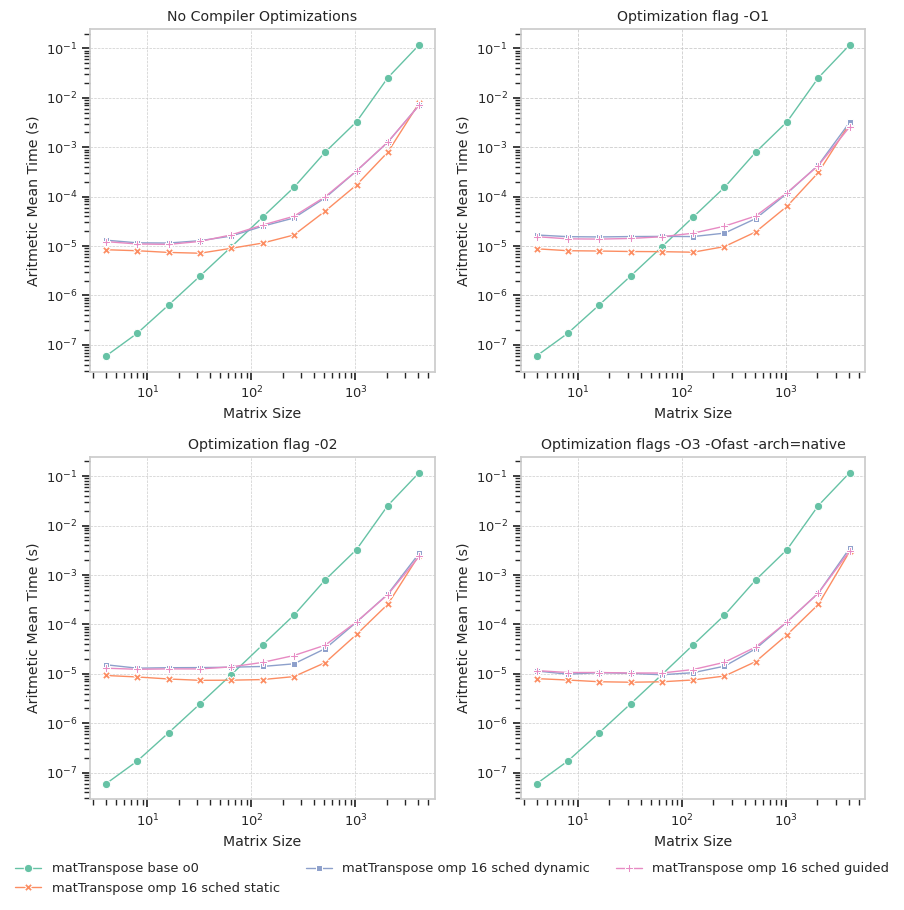

In [14]:
sns.set_theme(style="whitegrid", palette="Set2", font_scale=0.85, rc={
    'xtick.bottom': True,
    'ytick.left': True,
})

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

lp1 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_omp_sched_o0]),
    x="space", y="mean", hue="name", style="name",
    markers=True, dashes=False, ax=axes[0][0],
    linewidth = 1
)

axes[0][0].set_yscale('log')
axes[0][0].set_xscale('log')
axes[0][0].set_title('No Compiler Optimizations')
axes[0][0].set_xlabel('Matrix Size')
axes[0][0].set_ylabel('Aritmetic Mean Time (s)')
axes[0,0].grid(True, which='major', linestyle='--', linewidth=0.5)


# TODO
lp2 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_omp_sched_o1]),
    x="space", y="mean", hue="name", style="name",
    markers=True, dashes=False, ax=axes[0][1], legend=False,
    linewidth = 1
)
axes[0][1].set_yscale('log')
axes[0][1].set_xscale('log')
axes[0][1].set_title('Optimization flag -O1')
axes[0][1].set_xlabel('Matrix Size')
axes[0][1].set_ylabel('Aritmetic Mean Time (s)')
axes[0,1].grid(which='major', linestyle='--', linewidth=0.6)

lp3 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_omp_sched_o2]),
    x="space", y="mean", hue="name", style="name",
    markers=True, dashes=False, ax=axes[1][0], legend=False,
    linewidth = 1
)
axes[1][0].set_yscale('log')
axes[1][0].set_xscale('log')
axes[1][0].set_title('Optimization flag -02')
axes[1][0].set_xlabel('Matrix Size')
axes[1][0].set_ylabel('Aritmetic Mean Time (s)')
axes[1,0].grid(which='major', linestyle='--', linewidth=0.5)

lp3 = sns.lineplot(
    data=pd.concat([checkSymm, checkSymm_omp_sched_o3]),
    x="space", y="mean", hue="name", style="name",
    markers=True, dashes=False, ax=axes[1][1], legend=False,
    linewidth = 1
)
axes[1][1].set_yscale('log')
axes[1][1].set_xscale('log')
axes[1][1].set_title('Optimization flags -O3 -Ofast -arch=native')
axes[1][1].set_xlabel('Matrix Size')
axes[1][1].set_ylabel('Aritmetic Mean Time (s)')
axes[1,1].grid(which='major', linestyle='--', linewidth=0.5)

sns.move_legend(
    lp1, "upper center",
    bbox_to_anchor=(1.05, -1.4), ncol=3, title="", frameon=False,
)
fig.subplots_adjust(hspace=0.25, wspace=0.25)
plt.show()
fig.savefig("../images/transpose_sched.svg", format='svg') 